<a href="https://colab.research.google.com/github/ravellys/Bootcamp-IGTI/blob/main/DevPython_Desafio_M%C3%B3dulo_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Módulo 4 - IGTI
---
## Ciência de Dados com Python
## Bootcamp Desenvolvedor Python
## Lucas Ravellys

# Doenças no coração

## Descrição dos Dados 

*   Sex - gênero do paciente ->Homem = 1, Mulher =0
*   Age - Idade do paciente
*   Diabetes - Possui diabetes? 0 = Não, 1 = Sim
*   Anaemia - Possui anemia? 0 = Não, 1 = Sim
*   High_blood_pressure - Possui pressão alta? 0 = Não, 1 = Sim
*   Smoking - É fumante? 0 = Não, 1 = Sim
*   DEATH_EVENT - evento de morte? 0 = Não, 1 = Sim

## **Justificativa**

## **Objetivo** 
Analisar os dados sobre mortes por doenças cardíacas e estime a possível morte de pessoas a partir desses dados.

In [ ]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ravellys/Bootcamp-IGTI/main/doencas_coracao.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.query("DEATH_EVENT == 0 and sex == 0").count()

age                         71
anaemia                     71
creatinine_phosphokinase    71
diabetes                    71
ejection_fraction           71
high_blood_pressure         71
platelets                   71
serum_creatinine            71
serum_sodium                71
sex                         71
smoking                     71
time                        71
DEATH_EVENT                 71
dtype: int64

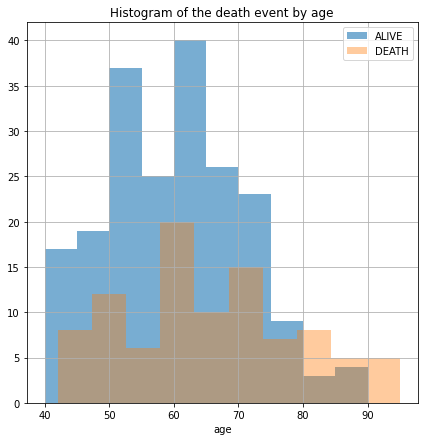

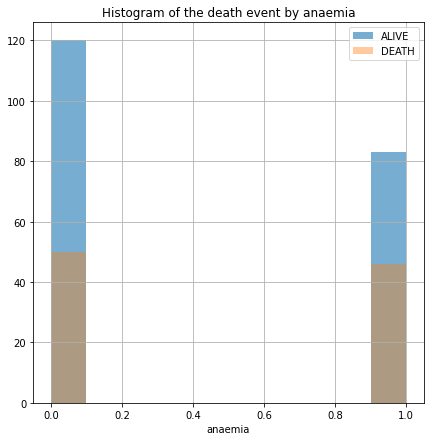

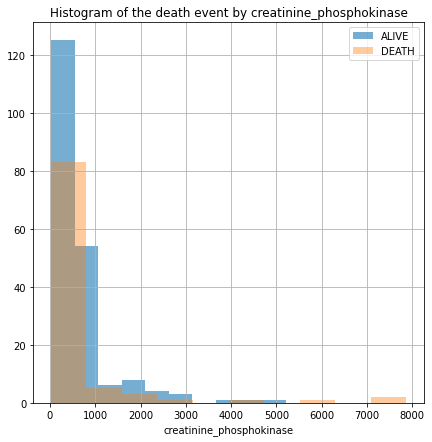

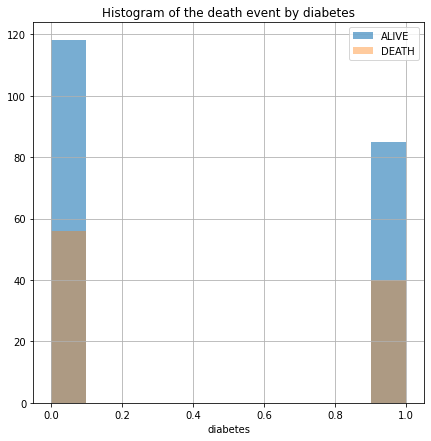

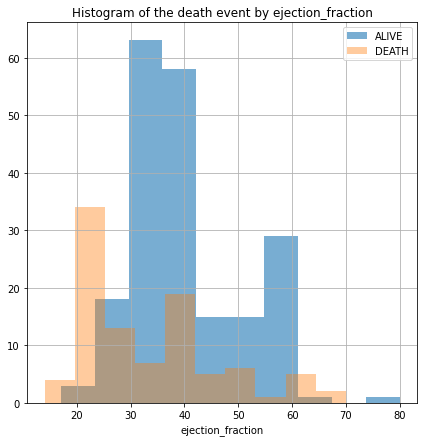

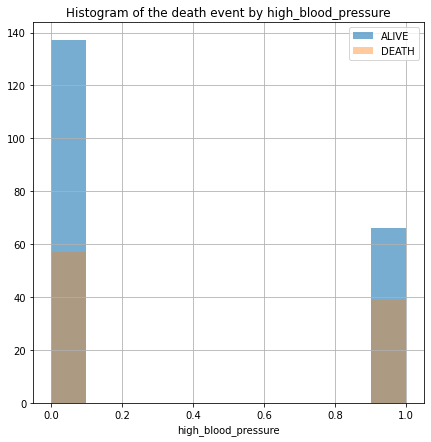

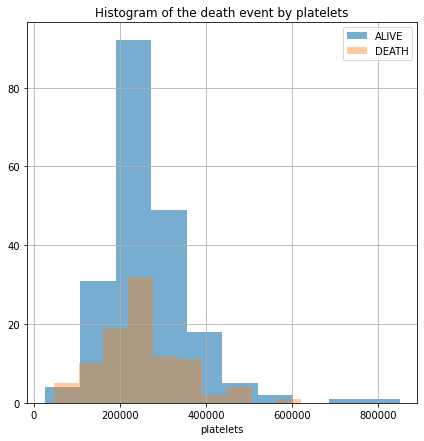

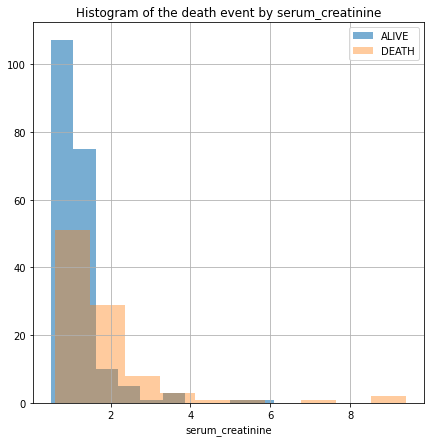

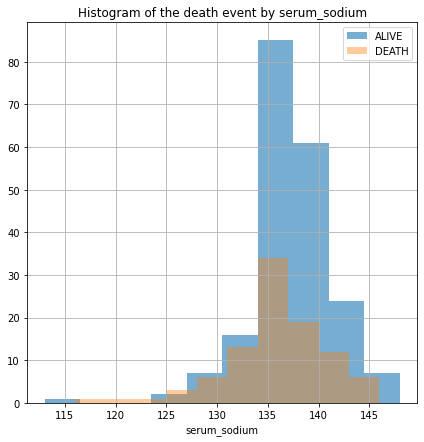

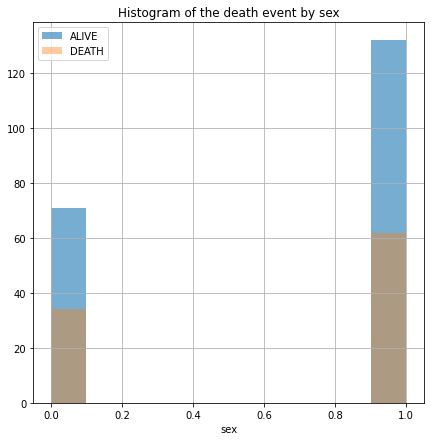

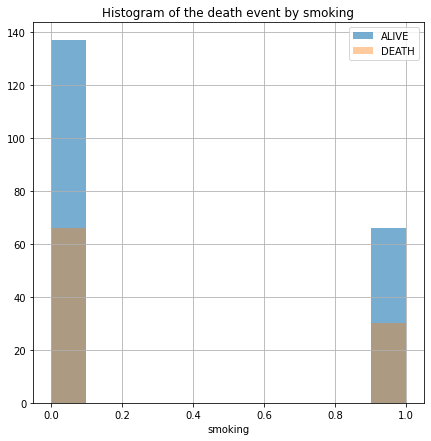

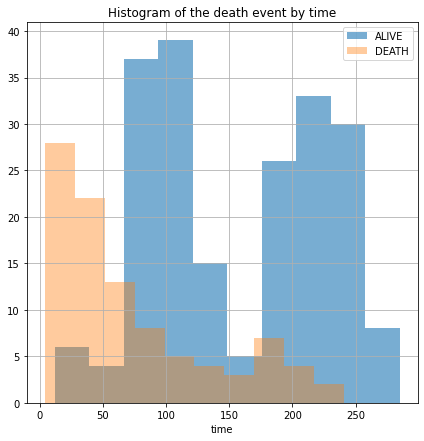

In [ ]:
# Histograma das mortes por atributos
def plot_histograma_atributo(df, atributo): 
  vivo = df[(df.DEATH_EVENT == 0)][atributo]
  morto = df[(df.DEATH_EVENT == 1)][atributo]

  fig, ax = plt.subplots(figsize=(7,7))
  vivo.hist(ax=ax, label="ALIVE", bins=10, alpha = .6)
  morto.hist(ax=ax, label="DEATH", bins=10, alpha = .4)
  ax.set_title(f"Histogram of the death event by {atributo}")
  ax.set_xlabel(atributo)
  ax.legend()
  plt.show()
  fig.savefig(f"distribuições_{atributo}.png" )
  

atributos = df.columns[:-1]

ims = []
for atributo in atributos:
  plot_histograma_atributo(df, atributo)

## Implementação do aprendizado de máquina

### Processamento dos dados

In [173]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [174]:
# Entrada / Saída
x = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [175]:
# Normalização dos dados
from sklearn.preprocessing  import MinMaxScaler

normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(x)

In [176]:
# treino / teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, y, test_size=0.30,random_state=42)

In [177]:
X_train.shape

(209, 12)

### ajuste dos modelos

In [178]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
y_pred = clf_KNN.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6111111111111112

In [179]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_train, y_train)
y_pred = clf_DT.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6666666666666666

In [180]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)
clf_MLP.fit(X_train, y_train)
y_pred = clf_MLP.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7111111111111111

In [181]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=10, random_state=1)
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7666666666666667

In [182]:
from sklearn.svm import SVC
clf_SVC = SVC(gamma='auto',random_state=1)
clf_SVC.fit(X_train, y_train)
y_pred = clf_SVC.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6

### validação cruzada

In [183]:
import numpy as np
SEED = 1232
np.random.seed(SEED)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# validação cruzada
def val_cruzada(model, x, y, n_splits=10, **kwargs):
  partes = KFold(n_splits, shuffle=True)
  modelo = model(**kwargs)
  resultados = cross_validate(modelo, x, y, cv=partes, scoring="accuracy")
  return resultados['test_score']

In [184]:
import matplotlib.pyplot as plt
# plot hist validação cruzada
def plot_hist_val_cruzada(title, model, x_treino, y_treino, n_splits=10, **kwargs):
  data = val_cruzada(model=model, x=x_treino, y=y_treino, n_splits=n_splits, **kwargs)
  ax.hist(data, bins=20, label=title, alpha = .4)

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = dict(
    KNeighborsClassifier={"model": KNeighborsClassifier, "kwargs":dict(n_neighbors=5)},
    RandomForestClassifier={"model": RandomForestClassifier, "kwargs":dict(max_depth=10, random_state=1)},
    SVC={"model": SVC, "kwargs":dict(gamma='auto',random_state=1)}, 
    MLPClassifier={"model": MLPClassifier, "kwargs":dict(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)},
)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

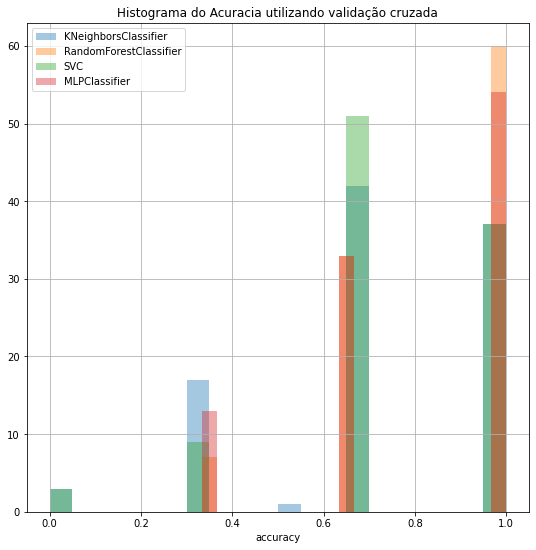

In [186]:
# Plot histograma de comparação

fig, ax = plt.subplots( figsize=(9, 9))
for i, name in enumerate(list(models.keys())):
  model=models[name]
  plot_hist_val_cruzada(title=name, model=model['model'],
                        x_treino=entradas_normalizadas, y_treino=y,
                        n_splits=100, **model['kwargs'])

plt.xlabel('accuracy')
plt.legend()
plt.grid()
plt.title("Histograma do Acuracia utilizando validação cruzada")
fig.savefig('cross_validat.png', bbox_inches='tight')
plt.show()

In [187]:
# validação cruzada
def val_cruzada(model, x, y, n_splits=10, **kwargs):

  partes = KFold(n_splits, shuffle=True)
  modelo = model(**kwargs)
  resultados = cross_validate(modelo, x, y, cv=partes, scoring="accuracy", return_train_score=True)
  return resultados['train_score'].mean(), resultados['test_score'].mean()


r_train = []
r_test = []
n_est = []
max_d = []

for n_estimators_ in range(1,31):
  for max_depth_ in range(1,31):
    kwargs = dict(max_depth=max_depth_, n_estimators=n_estimators_, random_state=SEED)
    r = val_cruzada(model=RandomForestClassifier, x=x, y=y, n_splits=10, **kwargs)
    r_train.append(r[0])
    r_test.append(r[1])
    n_est.append(n_estimators_)
    max_d.append(max_depth_)


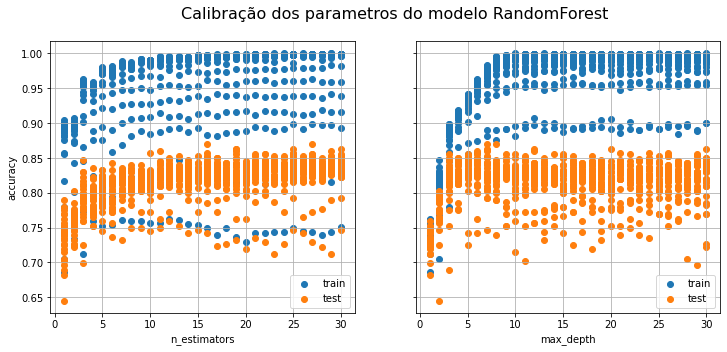

In [188]:
# Plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
ax = ax.ravel()

ax[0].scatter(n_est, r_train, label='train')
ax[0].scatter(n_est, r_test, label='test')

ax[1].scatter(max_d, r_train, label='train')
ax[1].scatter(max_d, r_test, label='test')

ax[0].grid()
ax[0].set_ylabel("accuracy")
ax[0].legend()
ax[0].set_xlabel("n_estimators")

ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("max_depth")

plt.text(-25, 1.05, r'Calibração dos parametros do modelo RandomForest', size=16)

fig.savefig('hiper_param.png', bbox_inches='tight')

# Concorrencia

In [189]:
import time
import random
def contador():
  x = 10**9
  while x > 0:
    x -= 1
    # time.sleep(random.randint(1,20))


def imple_sequencial():
  contador()
  contador()

import threading
def imple_concorrente():
  t1 = threading.Thread(contador()) 
  t2 = threading.Thread(contador()) 
  t1.start() 
  t2.start()
  t1.join()
  t2.join()


In [ ]:
ti = time.time()
imple_sequencial()
print(f'tempo de execução imple_sequencial { time.time() - ti }')

In [ ]:
ti = time.time()
imple_concorrente()
print(f'tempo de execução imple_concorrente { time.time() - ti }')

tempo de execução imple_concorrente 110.59094333648682


# Programação reativa

In [191]:
!pip install rx

     |████████████████████████████████| 204kB 2.8MB/s 


In [195]:
import rx
import rx.operators as ops

In [199]:
source = rx.from_iterable([5,4,3,"2",1]) #streaming
disposable = source.pipe(
    ops.filter(lambda i: i%2 == 0)
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e:print("on_error: {}".format(e)),
) #inscrição do observer

on_next: 4
on_error: not all arguments converted during string formatting
